#  **Install YOLOv8**

In [ ]:
## Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.4/107.7 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

# **Inference with Pre-trained COCO Model**

Ultralytics YOLOv8.2.103 🚀 Python-3.11.12 torch-2.2.2+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 /content/Pedestrians.jpg: 640x320 1 person, 69.2ms
Speed: 2.8ms preprocess, 69.2ms inference, 135.7ms postprocess per image at shape (1, 3, 640, 320)
Results saved to runs/detect/predict5
💡 Learn more at https://docs.ultralytics.com/modes/predict


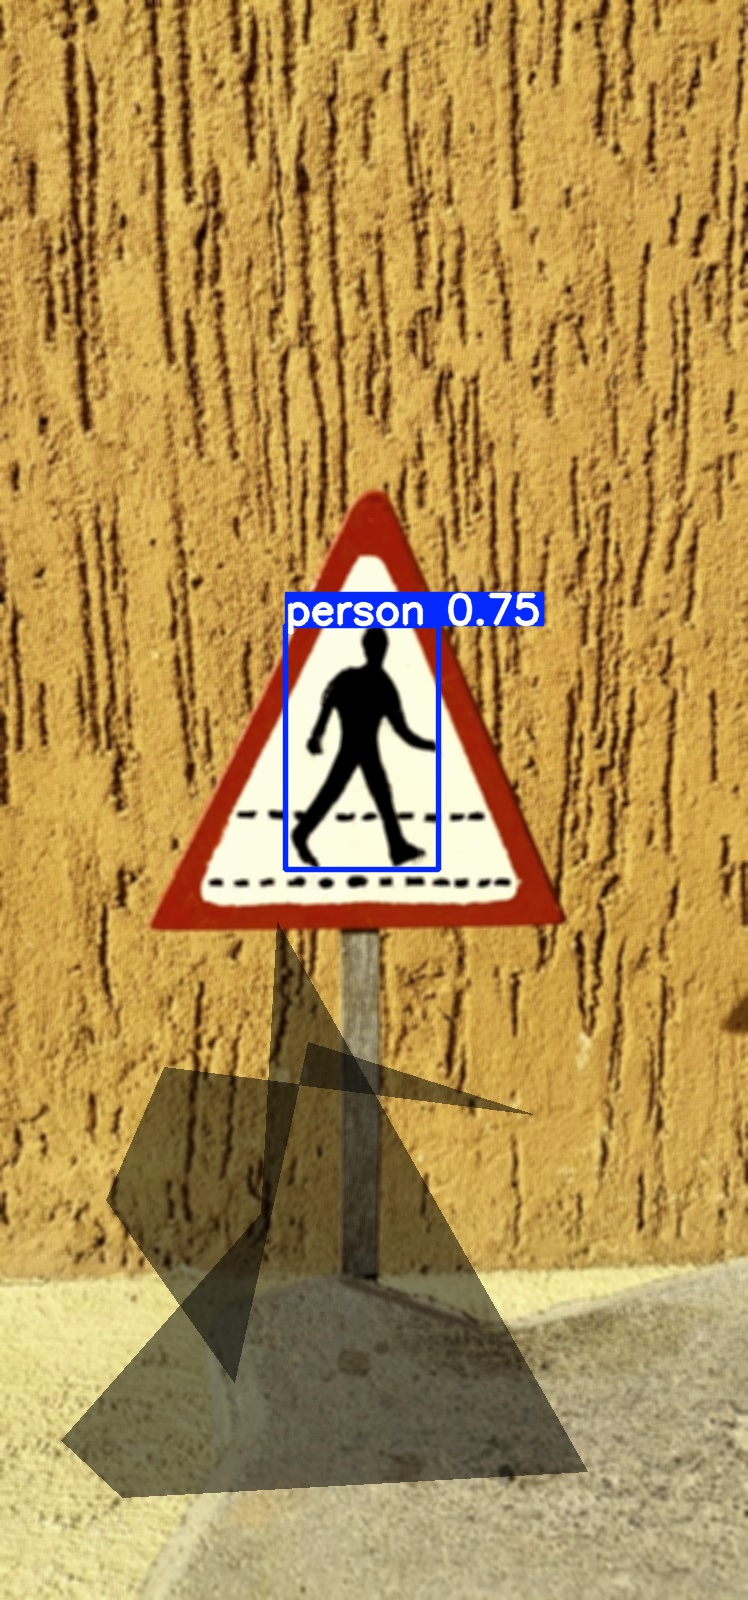

In [ ]:
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='Pedestrians.jpg'

#from IPython.display import Image
Image(filename='runs/detect/predict/Pedestrians.jpg', height=300)

In [ ]:
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='*.jpg'  # Processes all JPGs in the current dir


Ultralytics YOLOv8.2.103 🚀 Python-3.11.12 torch-2.2.2+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

image 1/6 /content/No_entry.jpg: 640x320 1 stop sign, 86.5ms
image 2/6 /content/Pedestrians.jpg: 640x320 1 person, 7.3ms
image 3/6 /content/Stop.jpg: 640x320 1 stop sign, 6.8ms
image 4/6 /content/Turn_left_ahead.jpg: 640x320 (no detections), 6.6ms
image 5/6 /content/Turn_right_ahead.jpg: 640x320 (no detections), 6.9ms
image 6/6 /content/Yield.jpg: 640x320 (no detections), 10.7ms
Speed: 2.2ms preprocess, 20.8ms inference, 22.4ms postprocess per image at shape (1, 3, 640, 320)
Results saved to runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


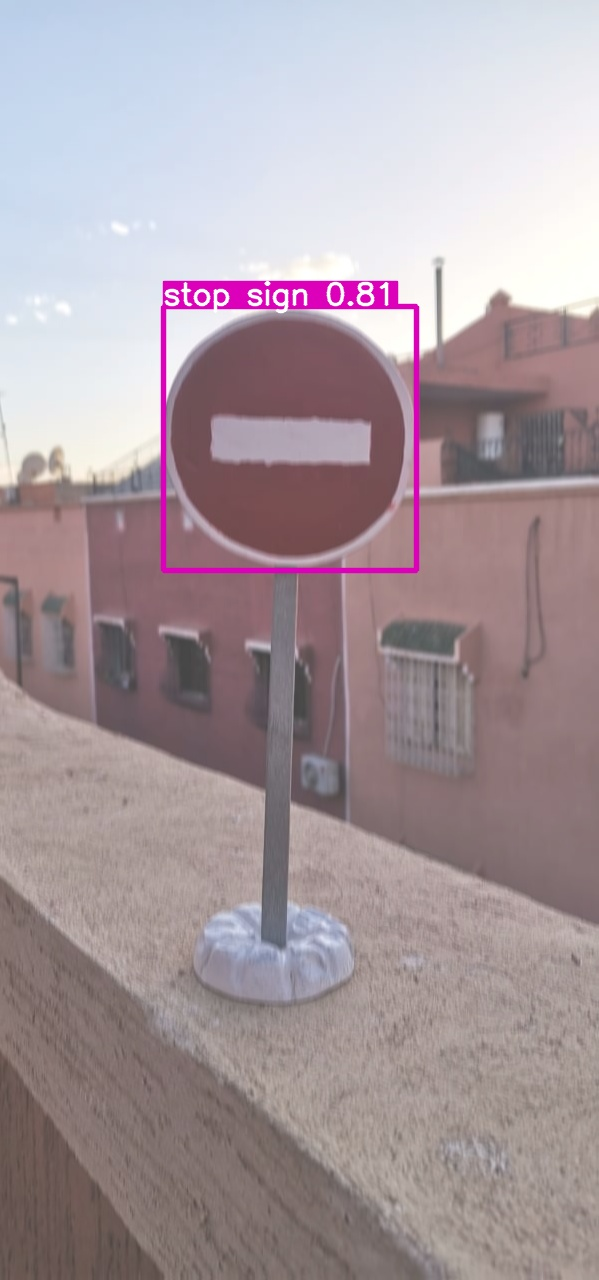

Predicted: runs/detect/predict4/No_entry.jpg


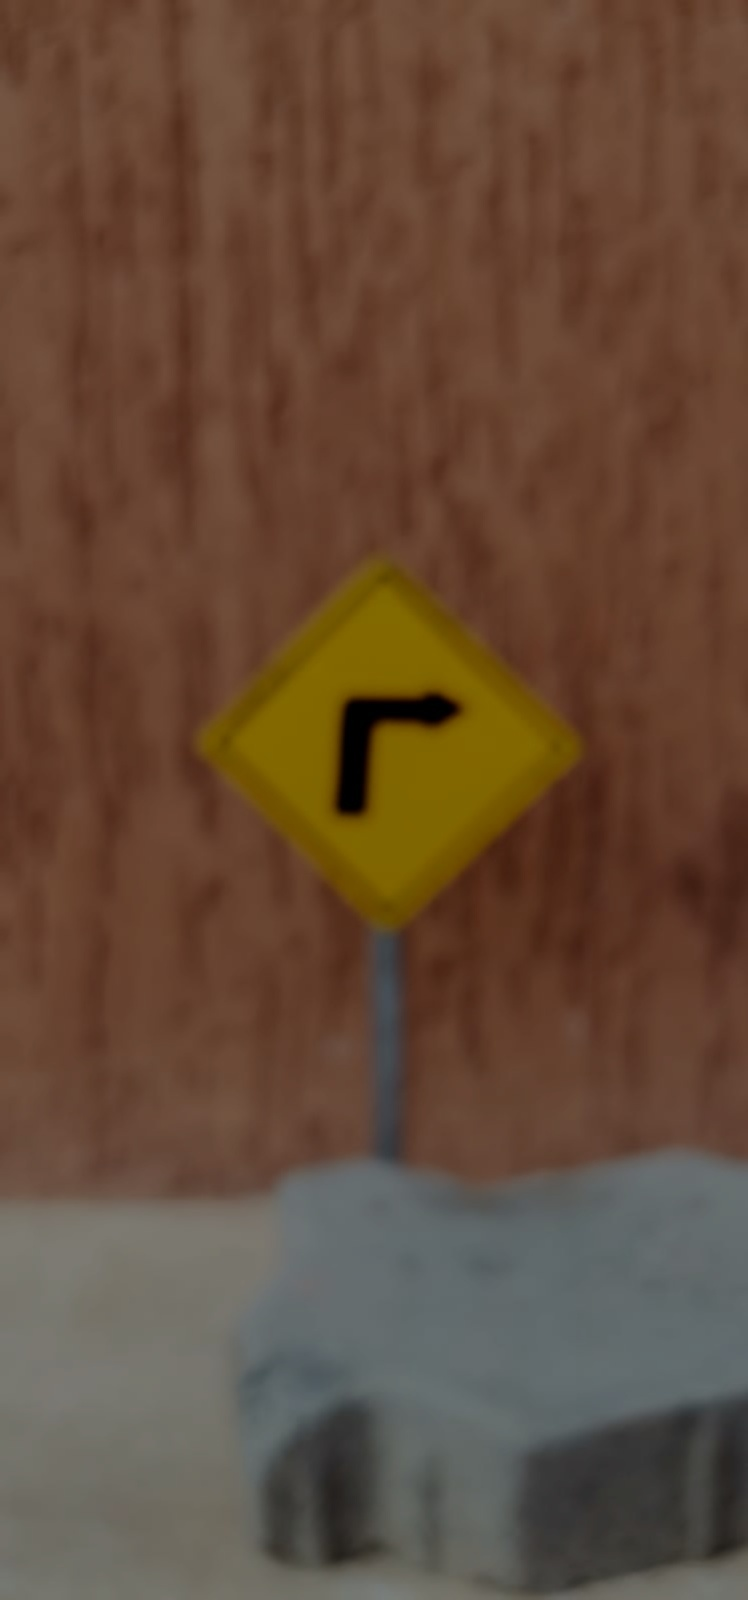

Predicted: runs/detect/predict4/Turn_right_ahead.jpg


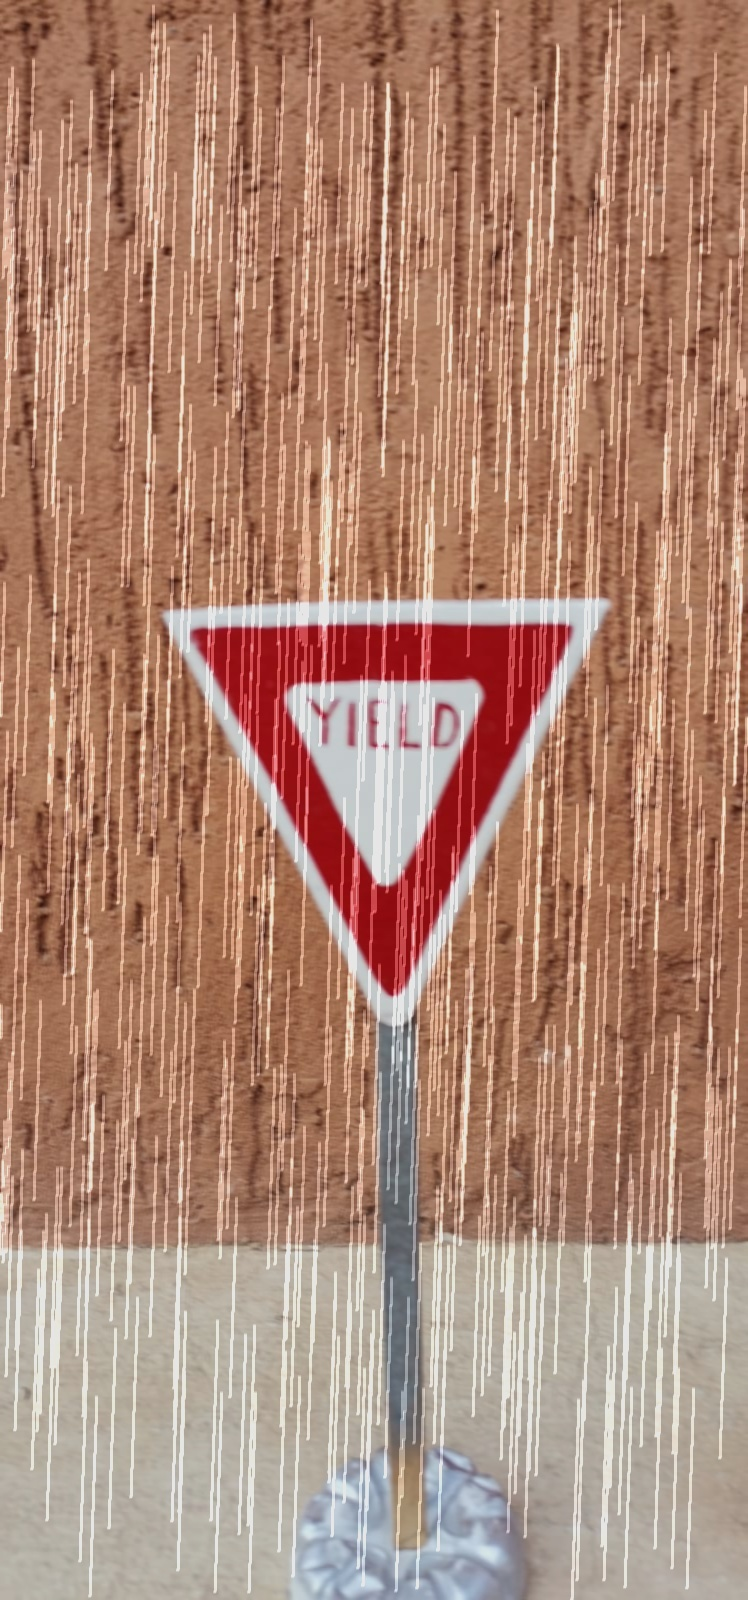

Predicted: runs/detect/predict4/Yield.jpg


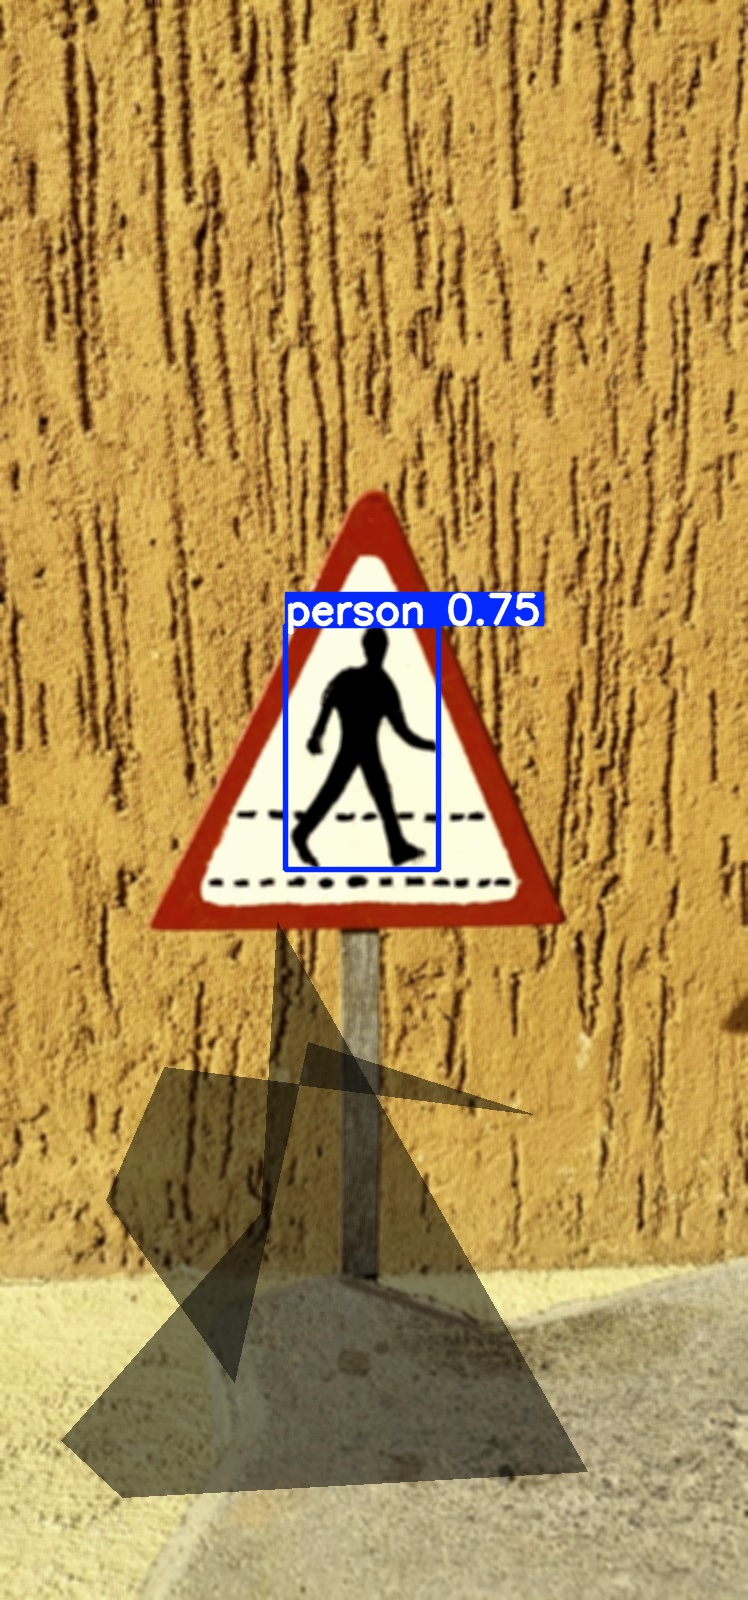

Predicted: runs/detect/predict4/Pedestrians.jpg


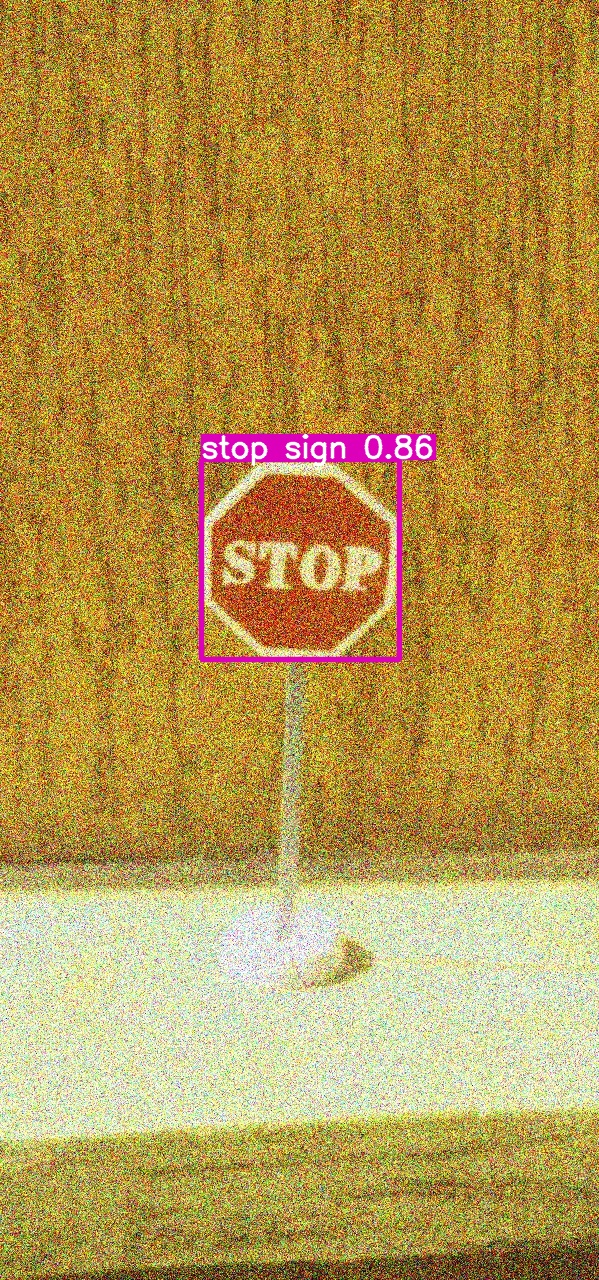

Predicted: runs/detect/predict4/Stop.jpg


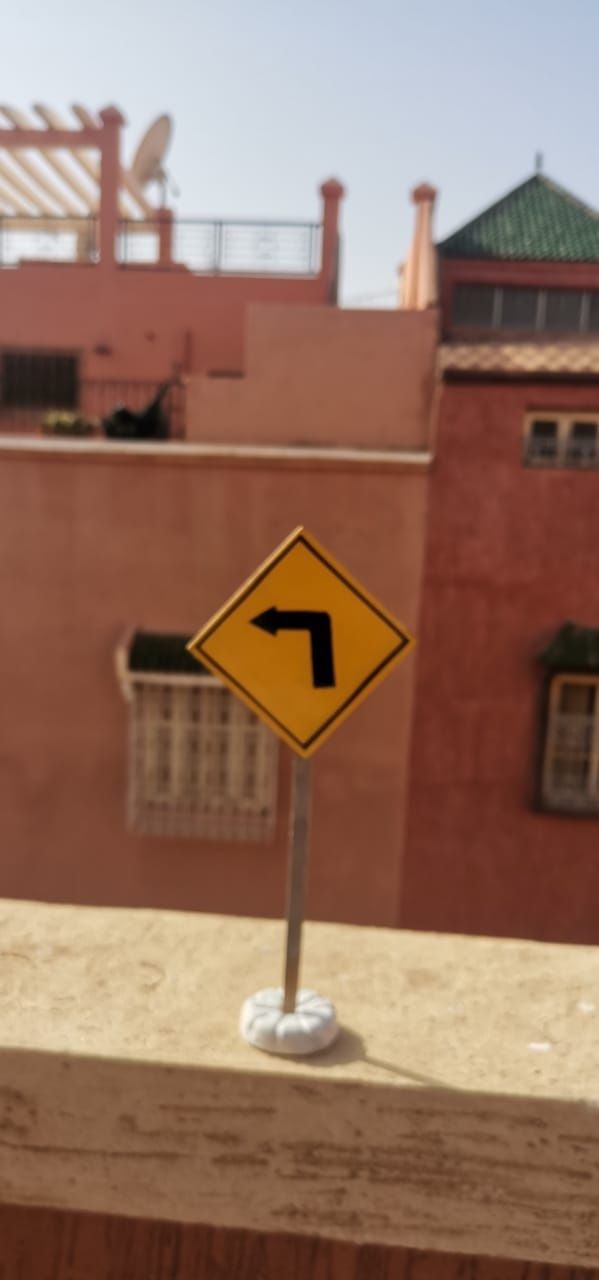

Predicted: runs/detect/predict4/Turn_left_ahead.jpg


In [ ]:
# Display all predicted images
#from IPython.display import display, Image
import glob

for img_path in glob.glob('runs/detect/predict4/*.jpg'):  # Path where predictions are saved
    display(Image(filename=img_path, height=400))
    print(f"Predicted: {img_path}")

# **Upload dataset**

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Tz5FdPrgSydq1RLk8NSt")
project = rf.workspace("zahra-abouhane-b7ahw").project("neurodrivearticle_dataaug")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to NeurodriveArticle_DataAug-1 in yolov8:: 100%|██████████| 4380/4380 [00:00<00:00, 5611.95it/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=50 imgsz=640 plots=True

[Errno 2] No such file or directory: '{HOME}'
/content
100% 6.25M/6.25M [00:00<00:00, 122MB/s]
New https://pypi.org/project/ultralytics/8.3.139 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/NeurodriveArticle_DataAug-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, 

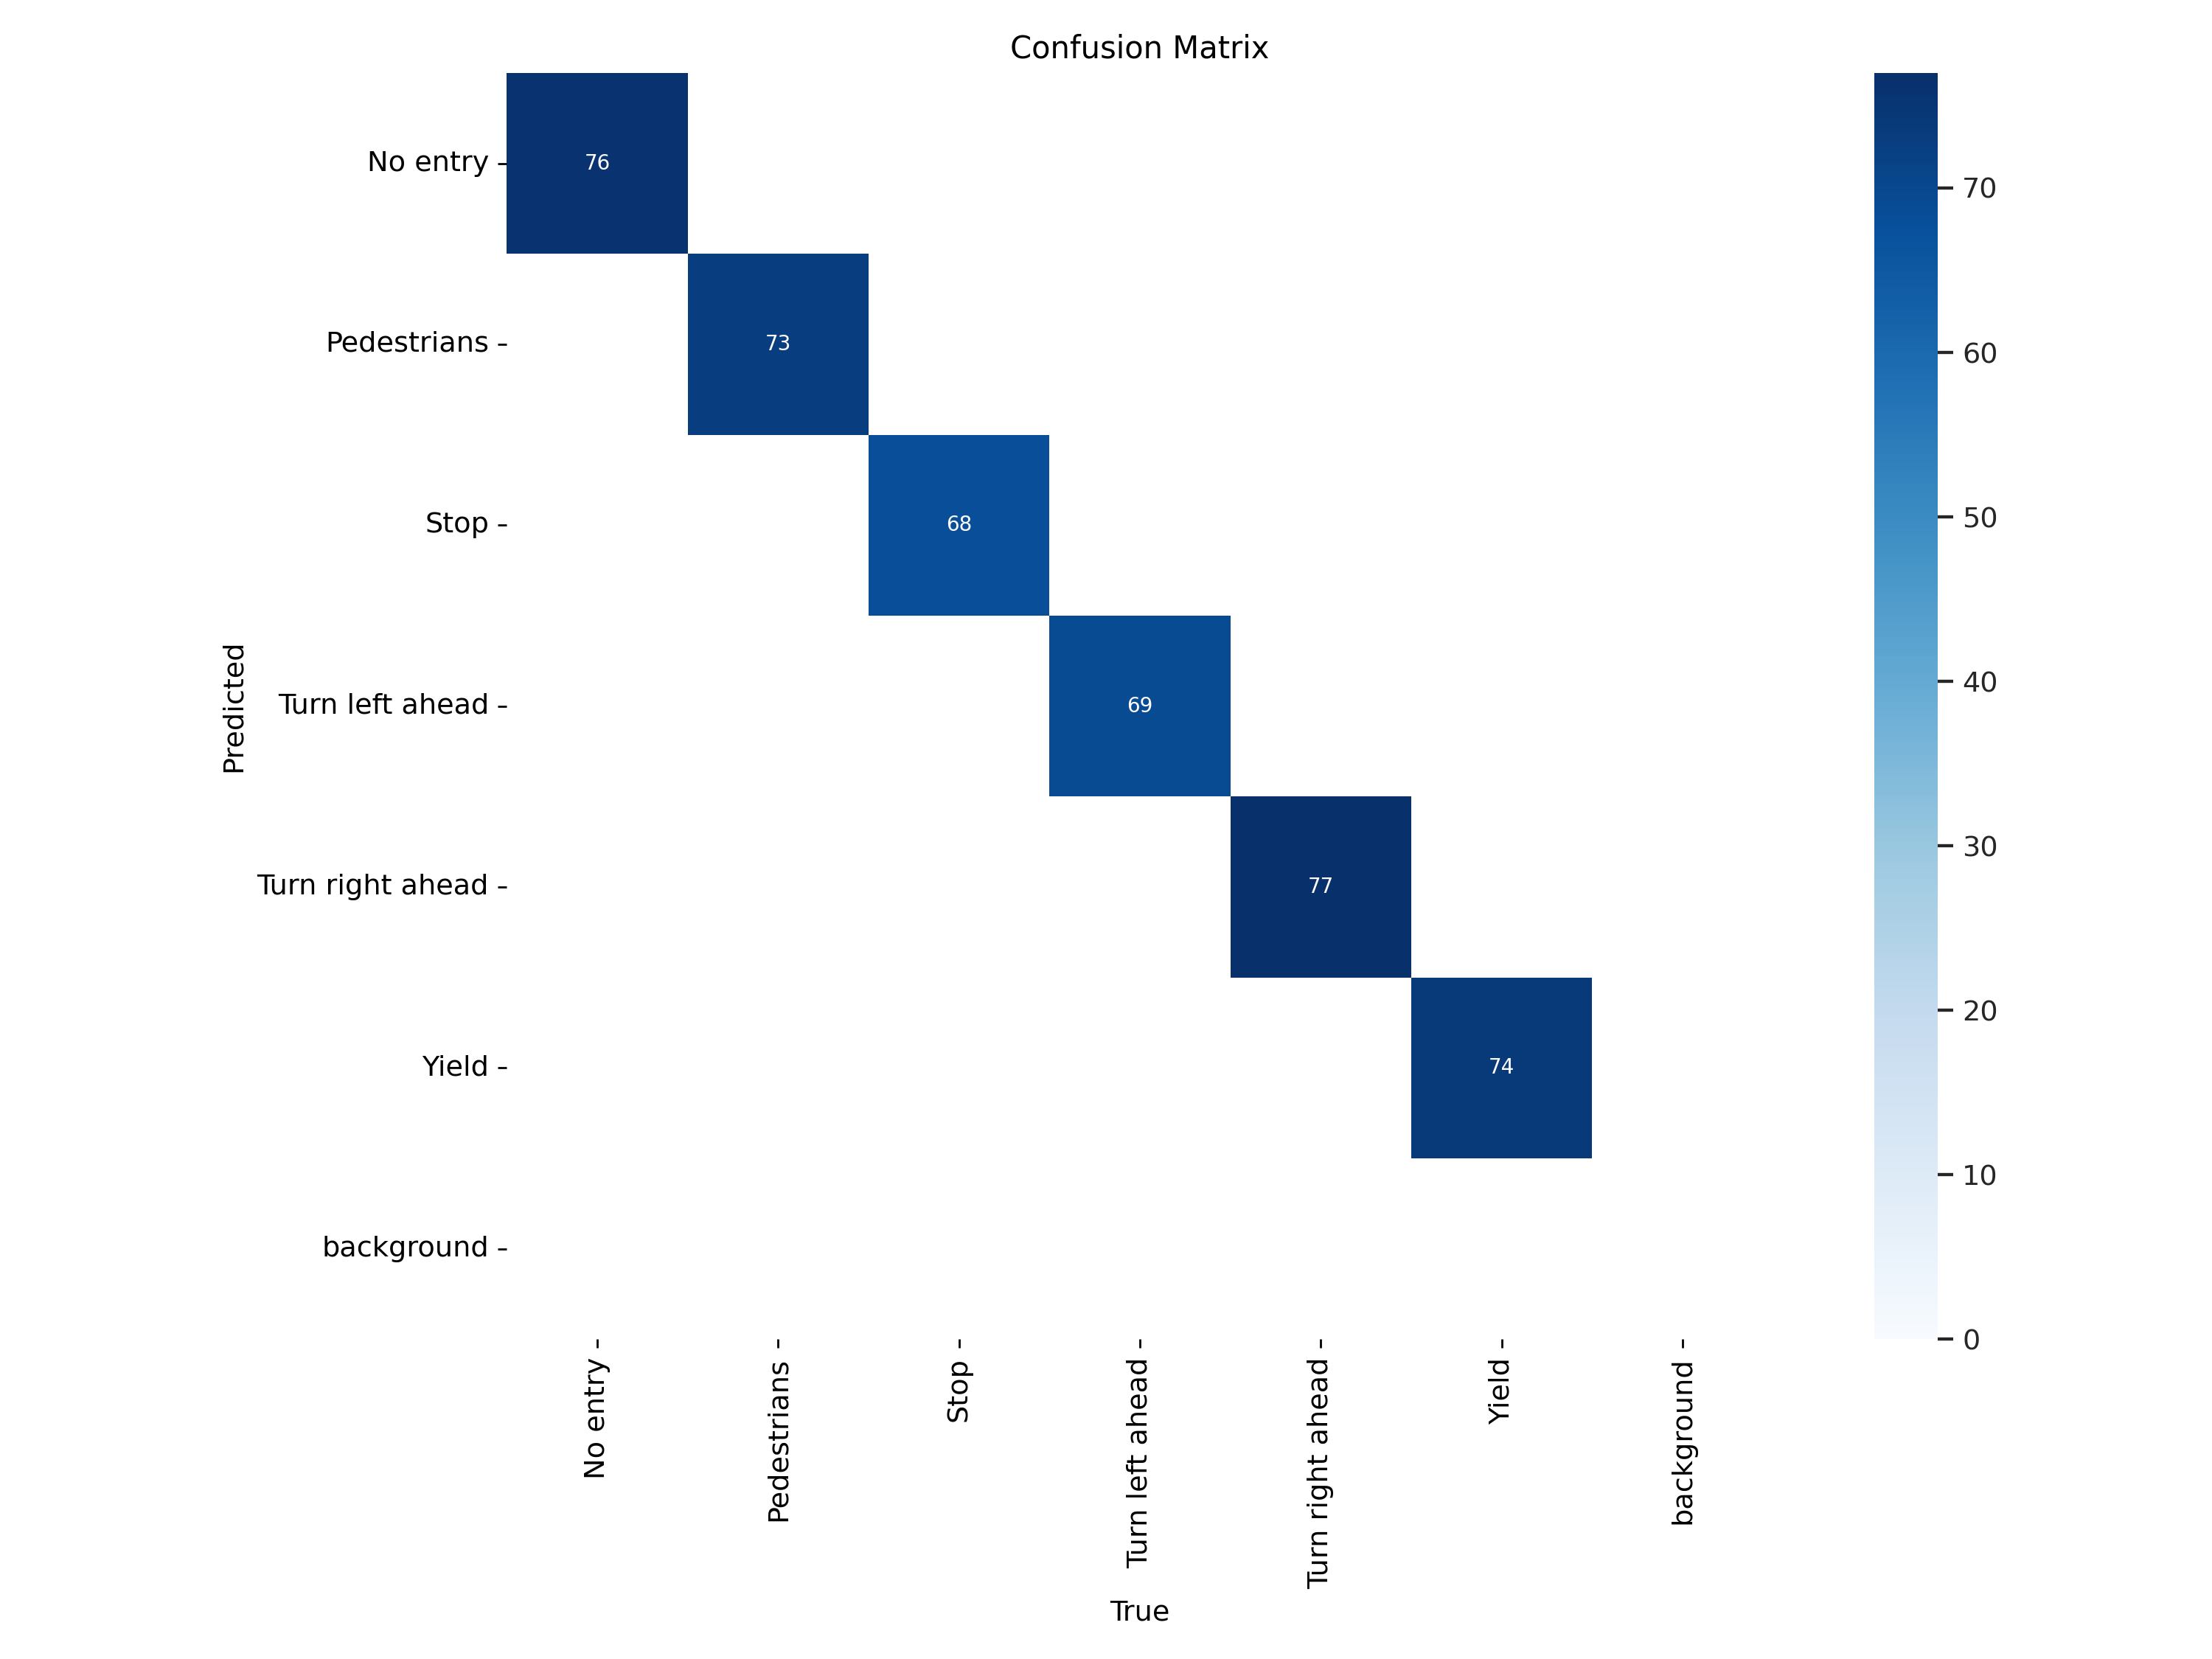

In [ ]:
Image(filename='/content/runs/detect/train/confusion_matrix.png', width=600)

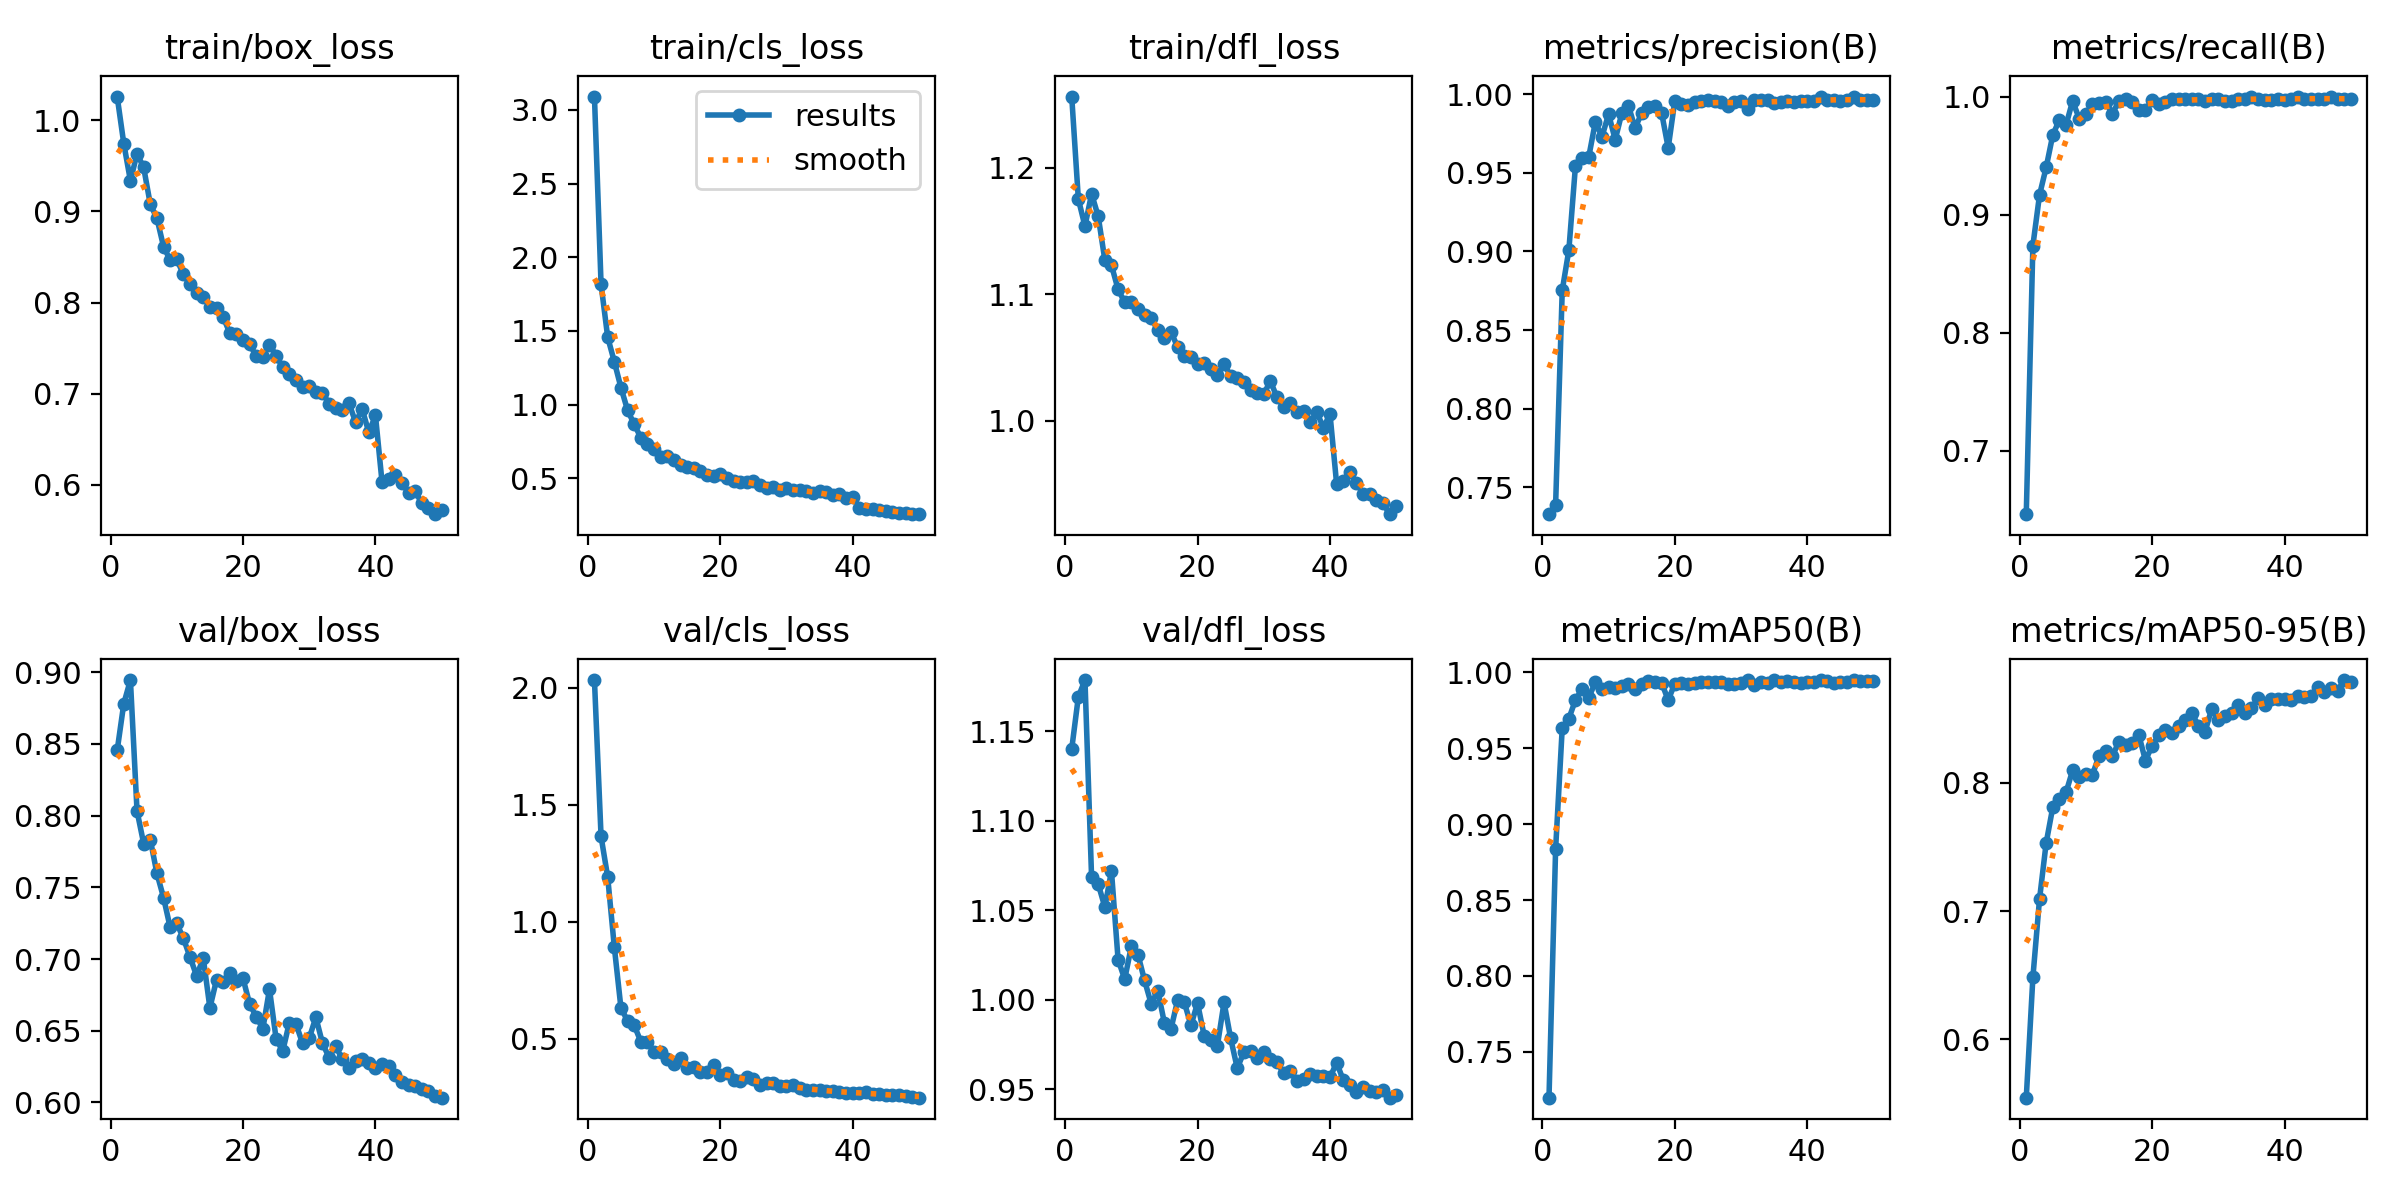

In [ ]:
Image(filename='/content/runs/detect/train/results.png', width=600)

# **Validate Custom Model**

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.2.103 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/NeurodriveArticle_DataAug-1/valid/labels.cache... 437 images, 0 backgrounds, 0 corrupt: 100% 437/437 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 28/28 [00:05<00:00,  4.88it/s]
                   all        437        437      0.996      0.998      0.994       0.88
              No entry         76         76      0.987      0.987      0.991      0.827
           Pedestrians         73         73      0.998          1      0.995      0.882
                  Stop         68         68      0.998          1      0.995      0.871
       Turn left ahead         69         69      0.999          1      0.995      0.864
      Turn right ahead         77         77      0.998          1      0.995      0.909
                 Yield        

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.50 source={dataset.location}/test/images save=True

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/cfg/__init__.py", line 804, in entrypoint
    model = YOLO(model, task=task)
            ^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/models/yolo/model.py", line 23, in __init__
    super().__init__(model=model, task=task, verbose=verbose)
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 145, in __init__
    self._load(model, task=task)
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 285, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
                            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/nn/tasks.py", line 906, in attempt_load_one_weight
    ckpt, weight = torch_safe_load(weight)  # load ckpt
     

In [ ]:
#test on non seen data
!yolo task=detect mode=predict model=/best.pt conf=0.25 source='/content/drive/MyDrive/test_withGTSRB/Meta/*.png'  # Processes all JPGs in the current dir


Ultralytics YOLOv8.2.103 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs

image 1/43 /content/drive/MyDrive/test_withGTSRB/Meta/0.png: 640x640 1 No entry, 685.8ms
image 2/43 /content/drive/MyDrive/test_withGTSRB/Meta/1.png: 640x640 (no detections), 356.2ms
image 3/43 /content/drive/MyDrive/test_withGTSRB/Meta/10.png: 640x640 (no detections), 329.0ms
image 4/43 /content/drive/MyDrive/test_withGTSRB/Meta/11.png: 576x640 1 Pedestrians, 189.8ms
image 5/43 /content/drive/MyDrive/test_withGTSRB/Meta/12.png: 640x640 1 Pedestrians, 193.8ms
image 6/43 /content/drive/MyDrive/test_withGTSRB/Meta/13.png: 576x640 1 Pedestrians, 186.0ms
image 7/43 /content/drive/MyDrive/test_withGTSRB/Meta/14.png: 640x640 (no detections), 192.3ms
image 8/43 /content/drive/MyDrive/test_withGTSRB/Meta/15.png: 640x640 1 Pedestrians, 232.8ms
image 9/43 /content/drive/MyDrive/test_withGTSRB/Meta/16.png: 640x640 (no detections), 2

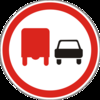

Predicted: runs/detect/predict/10.png


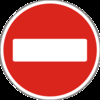

Predicted: runs/detect/predict/17.png


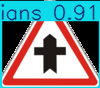

Predicted: runs/detect/predict/11.png


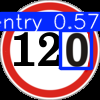

Predicted: runs/detect/predict/8.png


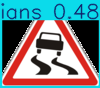

Predicted: runs/detect/predict/23.png


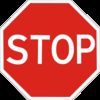

Predicted: runs/detect/predict/14.png


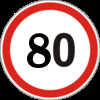

Predicted: runs/detect/predict/5.png


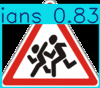

Predicted: runs/detect/predict/28.png


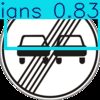

Predicted: runs/detect/predict/41.png


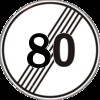

Predicted: runs/detect/predict/6.png


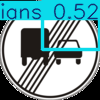

Predicted: runs/detect/predict/42.png


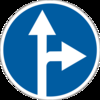

Predicted: runs/detect/predict/36.png


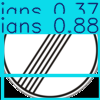

Predicted: runs/detect/predict/32.png


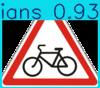

Predicted: runs/detect/predict/29.png


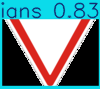

Predicted: runs/detect/predict/13.png


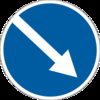

Predicted: runs/detect/predict/38.png


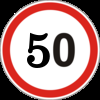

Predicted: runs/detect/predict/2.png


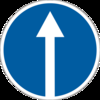

Predicted: runs/detect/predict/35.png


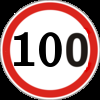

Predicted: runs/detect/predict/7.png


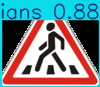

Predicted: runs/detect/predict/27.png


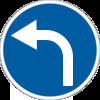

Predicted: runs/detect/predict/34.png


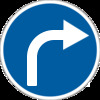

Predicted: runs/detect/predict/33.png


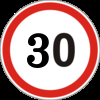

Predicted: runs/detect/predict/1.png


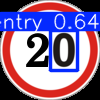

Predicted: runs/detect/predict/0.png


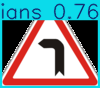

Predicted: runs/detect/predict/19.png


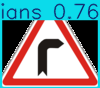

Predicted: runs/detect/predict/20.png


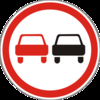

Predicted: runs/detect/predict/9.png


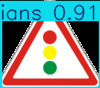

Predicted: runs/detect/predict/26.png


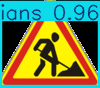

Predicted: runs/detect/predict/25.png


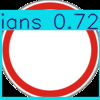

Predicted: runs/detect/predict/15.png


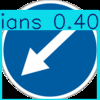

Predicted: runs/detect/predict/39.png


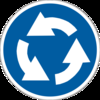

Predicted: runs/detect/predict/40.png


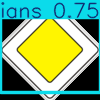

Predicted: runs/detect/predict/12.png


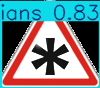

Predicted: runs/detect/predict/30.png


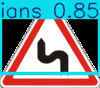

Predicted: runs/detect/predict/21.png


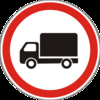

Predicted: runs/detect/predict/16.png


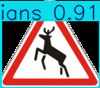

Predicted: runs/detect/predict/31.png


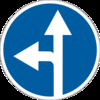

Predicted: runs/detect/predict/37.png


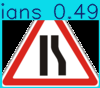

Predicted: runs/detect/predict/24.png


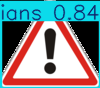

Predicted: runs/detect/predict/18.png


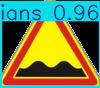

Predicted: runs/detect/predict/22.png


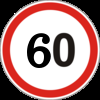

Predicted: runs/detect/predict/3.png


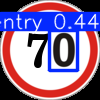

Predicted: runs/detect/predict/4.png


In [ ]:
#test on non seen data
#from IPython.display import display, Image
import glob

for img_path in glob.glob('runs/detect/predict/*.png'):  # Path where predictions are saved
    display(Image(filename=img_path, height=200))
    print(f"Predicted: {img_path}")

# **Fine tune**

In [ ]:
!pip install torch

In [ ]:
import torch
import torch.nn.utils.prune as prune
from ultralytics import YOLO

# Load the YOLOv8 model
yolo = YOLO("runs/detect/train/weights/best.pt")  # Replace "best.pt" with the path to your YOLOv8 model
model = yolo.model

# Apply pruning to convolutional layers
for name, module in model.named_modules():
    if isinstance(module, torch.nn.Conv2d):
        # Prune 20% of the weights
        prune.l1_unstructured(module, name="weight", amount=0.2)
        print(f"Pruned {name}")

# Remove pruning reparametrizations
for name, module in model.named_modules():
    if isinstance(module, torch.nn.Conv2d):
        prune.remove(module, "weight")

# Save the pruned model in YOLOv8-compatible format
checkpoint = {"model": model, "epoch": 0}
torch.save(checkpoint, "pruned_model.pt")
print("Pruned model saved as pruned_model.pt")

In [ ]:
!yolo train model=pruned_model.pt data={dataset.location}/data.yaml epochs=50 imgsz=600 plots=True